## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Ohlman'  # string
student['Firstname']='Elin' # string
student['CID']='ohlman'        # string
student['DOB-year']=1998        # four-digit integer
student['DOB-month']=6           # integer in the range [1, 12]
student['DOB-day']=18             # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 29-Aug-2020 by Christian Forssén [christian.forssen@chalmers.se]

## Problem 1
### (1 point)

#### Installations
Perform the installations and preparations that are described in the Getting Started instructions. At the end you should have:

1. downloaded the current version of the course material from the github repository or from the course web page;
2. a running python installation that includes the modules listed in the environment.yml file (e.g. numpy, matplotlib, pandas, emcee, scikit-learn, ...);
3. been able to open and run the Jupyter Notebooks with the first week excercises.
Ask the computer lab supervisors for assistance if needed.

In [3]:
# Module needed for grading tests
import sys

# Make sure that you are running python with version >= 3.x
#
# Import the following python modules with
# the specified abreviations:
# ---
# numpy as np
# scipy as scipy
# matplotlib.pyplot as plt
# pandas as pd
# sklearn as skl
# emcee as emcee


# 
# YOUR CODE HERE
# 

import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee as emcee

In [4]:
assert sys.version_info.major>=3, \
    'You are running Python version'+\
    f'{sys.version_info.major}.{sys.version_info.minor}'

modules = [('numpy','np'), ('scipy', 'scipy'), \
           ('matplotlib.pyplot', 'plt'), ('pandas', 'pd'), \
           ('sklearn', 'skl'), ('emcee', 'emcee')]
for (_module, _module_abbrev) in modules:
    assert _module in sys.modules and _module_abbrev in dir(),\
        f'Module {_module} not loaded properly.'

## Problem 2
### (3 points)

#### Generate data

In [5]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)
m = 100 # Number of data

# X are picked uniform random [0,2]
X = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(m, 1)

#### (a) Perform a linear regression using the Normal Equation
Create the design matrix for a quadratic polynomial and solve the normal equation using matrix inversion.

In [6]:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m, order+1).
    """
    # 
    # YOUR CODE HERE
    # 
    #m = len(X)
    #powerlist = np.arange(1,degree+1,1)
    #X_d = np.ones((m,1))
    #for i in powerlist:
        #X_d =np.c_[X_d,np.power(np.array(X), np.multiply(np.ones((m,1)),i))]
    #X_d = [np.power(np.array(X), np.multiply(np.ones((m,1)),n)) for n in powerlist] tried to do it with list comprehension
    
    

    m = len(X)
    X_d = np.ones((m,degree+1))
    for i in range(0,m):
        for j in range(0,degree+1):
            X_d[i][j]=X[i][0]**j
    
    return X_d

In [7]:
assert design_matrix(X).shape == (len(X),3)
assert design_matrix(X)[:,0].all() == 1
assert design_matrix(X)[0,1] == X[0]
assert design_matrix(X)[0,2] == X[0]**2

In [8]:
def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
    """
    # 
    # YOUR CODE HERE
    # 
    theta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_d),X_d)),np.matmul(np.transpose(X_d),y))
    theta = theta.flatten()
    #theta_temp = []
    #for i in np.arange(0,theta.size,1):
        #theta_temp = np.append(theta_temp, theta[i][0])
        
    #theta = theta_temp
    #theta = np.array([theta[0][0], theta[1][0], theta[2][0]])
    return theta
    

In [9]:
assert (solve_normal_equation(design_matrix(X), y)).shape==(3,),\
    'Return object has wrong shape. Maybe the `flatten` method will be useful?'

#### (b) Comparisons: 
Compare the coefficients from the true data generator and the normal equation. Plot the data and the model predictions in the same figure.

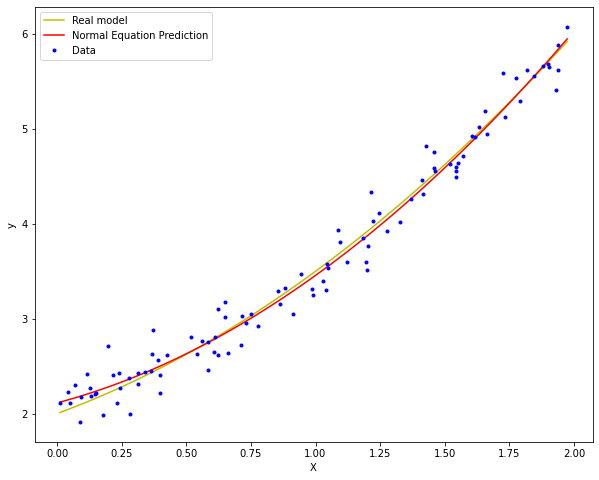

In [10]:
# 
# YOUR CODE HERE
# 

def y_predict(theta, X):
    """returns y values for array x for a given theta"""
    
    #y = theta[0] + theta[1]*x + theta[2]*x**2 ....
    
    y = np.multiply(np.ones((len(X),1)),theta[0])
    for i in np.arange(1,theta.size,1):
        y = y + np.multiply(theta[i],np.power(X,i)) 
        
    return y

theta = solve_normal_equation(design_matrix(X),y)
    
x_predict = np.linspace(min(X),max(X),len(X))    # evenly spaced x values in the same range as the datapoints
y_true_data_generator = 0.5 * x_predict**2 + x_predict + 2
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_predict,y_true_data_generator, "y-", label = "Real model")
ax.plot(x_predict, y_predict(theta,x_predict), "r-",label="Normal Equation Prediction")
ax.plot(X, y, "b.",label="Data")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best');

## Problem 3
### (3 points)

There are three files in the directory `DataFiles`:
- `dataset1.dat`
- `dataset2.dat`
- `dataset3.dat`

Each data files contains two columns. The first column corresponds to the independent variables (the array X), and the second column corresponds to the dependent ones (the array y).

In [11]:
# This cell is used in the solution notebook to generate the data. 
# It is hidden in the student version.
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
# ---
# 
# YOUR CODE HERE
# 

#### (a) Implement linear regression and cost function
- Load a data set and split it into 60% training and 40% validation data using the python function below.
- Implement a linear regression function that takes training data as input and returns a best-fit parameter vector for a polynomial model of a specified degree.
- Implement a cost function that takes data and model parameters as input and returns the mean-squared error.

In [12]:
# built-in convenience function for splitting data
from sklearn.model_selection import train_test_split

def load_data(datafile, train_size=0.6):
    """
    Reads data from file and returns training and validation sets.
    
    Args:
        datafile: String with data filename path. The data file 
            should contain two columns: x, y
        train_size: float indicating the fraction of training data
            (default: 0.6)
            
    Returns:
        (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
    """
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, train_size=train_size, random_state=42)
    return (X_train, X_val, y_train, y_val)

In [13]:
# Implement a linear regression function that takes 
# training data as input and returns a best-fit parameter 
# vector for a polynomial model of a specified degree.
def linear_regression(X, y, degree=2):
    """
    Performs linear regression for a polynomial model.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        theta_fit: Best fit parameters. Array of shape (degree+1,)
    """
    # 
    # YOUR CODE HERE
    # 
    X_d = design_matrix(X,degree)
    theta = solve_normal_equation(X_d,y)
    return theta

In [14]:
datafile = 'DataFiles/dataset1.dat'
(X_train, X_val, y_train, y_val) = load_data(datafile)
assert len(linear_regression(X_train, y_train, degree=3))==4
a0_degree3fit_residual = \
    linear_regression(X_train, y_train, degree=3)[0] - 0.041779
assert abs(a0_degree3fit_residual) < 1e-7


In [15]:
# Implement a cost function that takes data and polynomial model 
# parameters as input and returns the mean-squared error.
def mean_squared_error(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE: Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    # 
    # YOUR CODE HERE
    # 
    m = len(y)
    
    MSE = 0
    y_model = np.array([])
    temp = 0
    for i in np.arange(0,m,1):
        temp = 0
        for j in np.arange(0,len(theta),1):
            temp = temp + theta[j]*(X[i]**j)    
        y_model = np.append(y_model,temp)
        MSE = MSE + (y[i]-y_model[i])**2
    MSE = 1/m *MSE
    return MSE

In [16]:
X_train=np.array([[1],[2],[3]])
y_train=np.array([[2],[5],[10]])


X_val = np.array([[4],[5]])
y_val = np.array([[17],[27]])
#MSE_train, MSE_val, theta_fit = \
    #polynomial_regression( (X_train, X_val, y_train, y_val), 2)
theta = linear_regression(X_train,y_train,2)
MSE = mean_squared_error(X_val,y_val,theta)
print(theta)

[ 1.00000000e+00 -2.27373675e-13  1.00000000e+00]


In [17]:
# Implement a function that takes data and polynomial model degree
# and returns the mean-squared error for both training and validation data
# as well as the best fit parameters.
def polynomial_regression( data, degree):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        data = (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
            
    Return:
        MSE_train: Mean-squared error of training data
        MSE_val: Mean-squared error of validation data
        theta_fit: Best fit parameters [array of shape (degree+1,)]
    """
    # 
    # YOUR CODE HERE
    # 
    theta_fit = linear_regression(data[0], data[2], degree)
    MSE_train = mean_squared_error(data[0],data[2], theta_fit)
    MSE_val = mean_squared_error(data[1], data[3], theta_fit)
    return MSE_train, MSE_val, theta_fit

In [18]:
X_train=np.array([[1],[2],[3]])
y_train=np.array([[2],[5],[10]])
assert mean_squared_error(X_train, y_train, np.array([1,0,1]))==0
assert mean_squared_error(X_train, y_train, np.array([0,0,0]))==43

X_val = np.array([[4],[5]])
y_val = np.array([[17],[27]])
MSE_train, MSE_val, theta_fit = \
    polynomial_regression( (X_train, X_val, y_train, y_val), 2)
assert MSE_val-0.5 < 1e-7


#### (b) Perform linear regression with different polynomial models
- For each data set you should then perform linear regression using polynomial models of order 1,2,3,4,5, and 20.
- Finally, print the fit coefficients for each polynomial model that was considered and print also the mean-squared error (MSE) for both the training and the validation sets.

In [19]:
print(np.array([1,2,3,4,5,20]))

[ 1  2  3  4  5 20]


In [20]:
# 
# YOUR CODE HERE
# 

data1 = load_data('DataFiles/dataset1.dat') #x_train,x_val,y_train,y_val
data2 = load_data('DataFiles/dataset2.dat')
data3 = load_data('DataFiles/dataset3.dat')



print('Data set 1')
for order in np.array([1,2,3,4,5,20]):
    MSE_train, MSE_val, theta_fit = polynomial_regression(data1,order)
    with np.printoptions(precision=4):
        print('\n')
        print('Order=', order, ':\t theta=\t\t', theta_fit, '\n\t\t MSE_train=\t', MSE_train, '\n\t\t MSE_val\t', MSE_val)#, MSE_val = {MSE_val:.0f}" )

print('\nData set 2')
for order in np.array([1,2,3,4,5,20]):
    MSE_train, MSE_val, theta_fit = polynomial_regression(data2,order)
    with np.printoptions(precision=4):
        print('\n')
        print('Order=', order, ':\t theta=\t\t', theta_fit, '\n\t\t MSE_train=\t', MSE_train, '\n\t\t MSE_val\t', MSE_val)#, MSE_val = {MSE_val:.0f}" )

        
print('\nData set 3')
for order in np.array([1,2,3,4,5,20]):
    MSE_train, MSE_val, theta_fit = polynomial_regression(data3,order)
    with np.printoptions(precision=4):
        print('\n')
        print('Order=', order, ':\t theta=\t\t', theta_fit, '\n\t\t MSE_train=\t', MSE_train, '\n\t\t MSE_val\t', MSE_val)#, MSE_val = {MSE_val:.0f}" )

       

#MSE_train, MSE_val, theta_fit = polynomial_regression(data1,2)







Data set 1


Order= 1 :	 theta=		 [ 8.6445 -1.2346] 
		 MSE_train=	 [58.0615] 
		 MSE_val	 [39.879]


Order= 2 :	 theta=		 [ 0.1291 -0.6367  2.5869] 
		 MSE_train=	 [4.412] 
		 MSE_val	 [4.1176]


Order= 3 :	 theta=		 [ 0.0418  1.2698  2.526  -0.3317] 
		 MSE_train=	 [2.3258] 
		 MSE_val	 [2.5441]


Order= 4 :	 theta=		 [ 1.9935  0.9906  0.5087 -0.2496  0.2495] 
		 MSE_train=	 [0.0097] 
		 MSE_val	 [0.0055]


Order= 5 :	 theta=		 [ 1.9932e+00  9.8228e-01  5.0992e-01 -2.4524e-01  2.4929e-01 -4.4104e-04] 
		 MSE_train=	 [0.0097] 
		 MSE_val	 [0.0056]


Order= 20 :	 theta=		 [ 1.8692e+00  1.0518e+00  8.3932e-01 -4.5240e-01 -1.3679e+00  1.5288e-01
  2.6844e+00 -8.4947e-03 -2.2037e+00 -3.8543e-02  1.0163e+00  2.0156e-02
 -2.8045e-01 -4.7157e-03  4.7298e-02  5.8362e-04 -4.7754e-03 -3.7068e-05
  2.6498e-04  9.5152e-07 -6.2114e-06] 
		 MSE_train=	 [0.0265] 
		 MSE_val	 [0.0215]

Data set 2


Order= 1 :	 theta=		 [2.9253 0.397 ] 
		 MSE_train=	 [3.9993] 
		 MSE_val	 [3.1513]


Order= 2 :	 theta

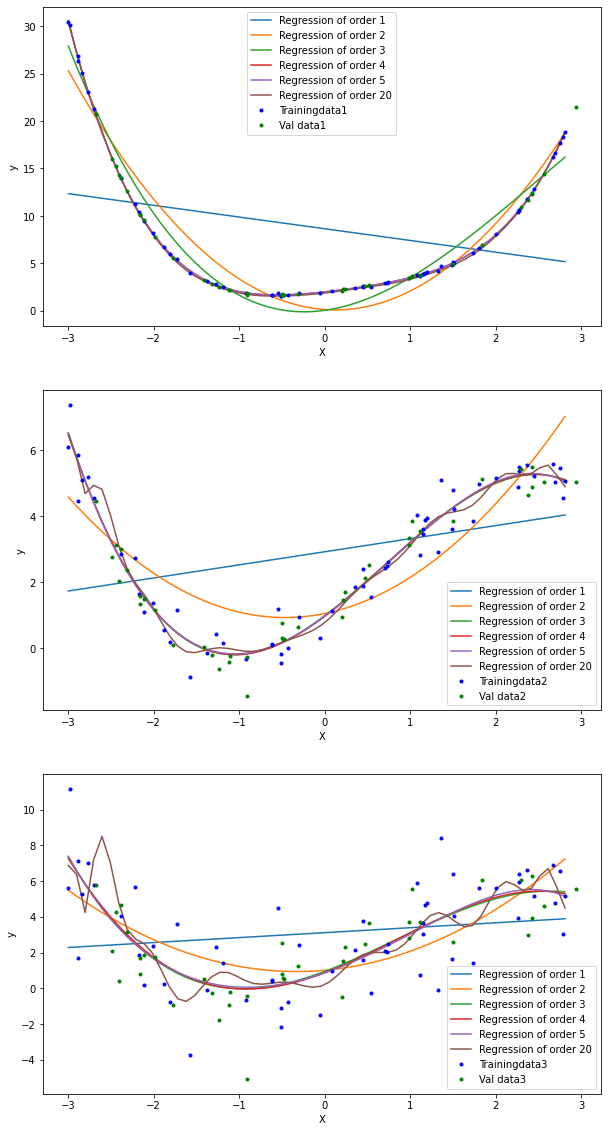

In [21]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
x_predict1 = np.linspace(min(data1[0]),max(data1[0]),len(data1[0])) # evenly spaced x values in the same range as the datapoints
for i in np.array([1,2,3,4,5,20]):   
    ax1.plot(x_predict1, y_predict(linear_regression(data1[0],data1[2],i),x_predict1),label="Regression of order %.0f"%(i))
    

ax1.plot(data1[0], data1[2], "b.",label="Trainingdata1")
ax1.plot(data1[1], data1[3], "g.",label="Val data1")
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend(loc='best');


x_predict2 = np.linspace(min(data2[0]),max(data2[0]),len(data2[0])) # evenly spaced x values in the same range as the datapoints
for i in np.array([1,2,3,4,5,20]):   
    ax2.plot(x_predict2, y_predict(linear_regression(data2[0],data2[2],i),x_predict2),label="Regression of order %.0f"%(i))
    

ax2.plot(data2[0], data2[2], "b.",label="Trainingdata2")
ax2.plot(data2[1], data2[3], "g.",label="Val data2")
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend(loc='best');

x_predict3 = np.linspace(min(data3[0]),max(data3[0]),len(data3[0])) # evenly spaced x values in the same range as the datapoints
for i in np.array([1,2,3,4,5,20]):   
    ax3.plot(x_predict3, y_predict(linear_regression(data3[0],data3[2],i),x_predict3),label="Regression of order %.0f"%(i))
    

ax3.plot(data3[0], data3[2], "b.",label="Trainingdata3")
ax3.plot(data3[1], data3[3], "g.",label="Val data3")
ax3.set_xlabel('X')
ax3.set_ylabel('y')
ax3.legend(loc='best');

Use the text cell below to answer the following two questions:
- Which degree polynomial do you think was used when generating the data?
- Which data set do you think has the most noise?

Discuss your reasoning.

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *

I think a polynomyal of degree 4 was used for generating data set 1, a polynomial of degree 3 was used for generating data set 2, and finally a polynomial of degree 3 was used for generating data set 3.

When you do a good polynomial fit a polynomial fit of higher degree will almost also be similarly good. Consider a polynomial of a very high degree, then we would be able to fit it to the data points quite well but between the points it would probably fluctuate a lot. The higher degree polynomial would not be very useful for making a model. Therefore when the MSE stabilizies and doesnt change very much in value we have probably found the right order of our polynom. I also plotted the data and my guesses seem reasonable.

I think data set 3 was the most noisy because the lowest MSE value for data set 3 was higher than the lowest for both data set 1 and 2. This is also supported buy looking at the plotted figures.

## Problem 4
### (3 points)

### Standard medical example by applying Bayesian rules of probability

Suppose there is an unknown disease (call it UD) and there is a test for it.

a. The false positive rate is 2.3%. ("False positive" means the test says you have UD, but you don't.) <br>
b. The false negative rate is 1.4%. ("False negative" means you have UD, but the test says you don't.)

Assume that 1 in 10,000 people have the disease. You are given the test and get a positive result.  Your ultimate goal is to find the probability that you actually have the disease. 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

We'll do it using the Bayesian rules.

We'll use the notation:

* $H$ = "you have UD"
* $\overline H$ = "you do not have UD"  
* $D$ = "you test positive for UD"
* $\overline D$ = "you test negative for UD"  

Use the text cell below to answer the following questions:
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD" 

a. *Before doing a calculation (or thinking too hard :), does your intuition tell you the probability you have the disease is high or low?*
<br>

b. *In the $p(\cdot | \cdot)$ notation, what is your ultimate goal?*
<br>

c. *Express the false positive rate in $p(\cdot | \cdot)$ notation.* \[Ask yourself first: what is to the left of the bar?\]
<br>

d. *Express the false negative rate in $p(\cdot | \cdot)$ notation. By applying the sum rule, what do you also know? (If you get stuck answering the question, do the next part first.)* 
<br>

e. *Should $p(D|H) + p(D|\overline H) = 1$?
    Should $p(D|H) + p(\overline D |H) = 1$?
    (Hint: does the sum rule apply on the left or right of the $|$?)*
<br>

f. *Apply Bayes' theorem to your result for your ultimate goal (don't put in numbers yet).
   What other probabilities do we need?*
<br>

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *

a) Low

b) $p(H|D)$

c) $p(D|\overline H)$

d) $p(\overline D | H)$ the sum rule gives us: $p(D | H) = 1 - p(\overline D | H) $ 

e) $p(D|H) + p(D|\overline H) \neq 1$. This only covers you getting a positive test result. Since you can also get a negative result the test the probability can't be equal to 1.

$p(D|H) + p(\overline D |H) = 1$ according to the sum rule. We can understand this as if you have the disease you will always test either positive or negative.

f) $p(H|D) = \frac{p(D|H)p(H)}{p(D)}$


In [22]:
# Please fill the probabilities as values for the 
# corresponding keys in the following dictionary.
medical_example_probabilities = {}
medical_example_probabilities['p(D|Hbar)'] = 0.023
medical_example_probabilities['p(Dbar|H)'] = 0.014
medical_example_probabilities['p(D|H)'] = 1- 0.014
medical_example_probabilities['p(H,Hbar|D)'] = 0 
medical_example_probabilities['p(Hbar)'] = 1 - 1/10000
medical_example_probabilities['p(D)'] = 1/10000 - 0.014 + 0.023
medical_example_probabilities['p(H|D)'] = ((1-0.014)*1/10000)/(1/10000 - 0.014 + 0.023)

# 
# YOUR CODE HERE
# P(d) = P(h) -p(dbar|h) + p(d|hbar)

In [23]:
for key in ['p(D|Hbar)', 'p(Dbar|H)', 'p(D|H)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.
    
assert medical_example_probabilities['p(H,Hbar|D)'] <= 1.0


In [24]:
for key in ['p(Hbar)', 'p(D)', 'p(H|D)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.